In [17]:
import	csv
f = open('daegu.csv','r',encoding='utf-8')
data = csv.reader(f,	delimiter=',')
count = 0
for	row	in	data:
    if	count	>	5:
        break
    else:
        print(row)
    count+= 1
f.close()

['\ufeff날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
['\t1907-01-31', '143', '', '-7', '0.8']
['\t1907-02-01', '143', '', '', '']
['\t1907-02-02', '143', '', '', '']
['\t1907-02-03', '143', '', '', '']
['\t1907-02-04', '143', '', '', '']


In [18]:
# encoding='utf-8-sig로 'ufett'제거
fin	=	open('daegu.csv',	'r',	encoding='utf-8-sig')
data=csv.reader(fin,delimiter=',')

# newline='' 한 라인씩 건너 뛰며 저장되는 현상 없앰
fout =	open('daegu-utf8.csv',	'w',	newline='',	encoding='utf-8-sig')
wr=csv.writer(fout)

for row in data: # 한 라인씩 읽음
    for i in range(len(row)):
        row[i] = row[i].replace('\t','')
    print(row) #바뀐 내용 출력
    wr.writerow(row) # writerow(row) : 한 행 씩 파일로 저장

fin.close()
fout.close()
print('파일 저장 완료')

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
['1907-01-31', '143', '', '-7', '0.8']
['1907-02-01', '143', '', '', '']
['1907-02-02', '143', '', '', '']
['1907-02-03', '143', '', '', '']
['1907-02-04', '143', '', '', '']
['1907-02-05', '143', '', '', '']
['1907-02-06', '143', '', '', '']
['1907-02-07', '143', '', '', '']
['1907-02-08', '143', '', '', '']
['1907-02-09', '143', '', '', '']
['1907-02-10', '143', '', '-3', '4.8']
['1907-02-11', '143', '', '', '']
['1907-02-12', '143', '', '', '']
['1907-02-13', '143', '', '', '']
['1907-02-14', '143', '', '', '']
['1907-02-15', '143', '', '', '']
['1907-02-16', '143', '', '', '']
['1907-02-17', '143', '', '', '']
['1907-02-18', '143', '', '', '']
['1907-02-19', '143', '', '', '']
['1907-02-20', '143', '', '-3.4', '7.6']
['1907-02-21', '143', '', '', '']
['1907-02-22', '143', '', '', '']
['1907-02-23', '143', '', '', '']
['1907-02-24', '143', '', '', '']
['1907-02-25', '143', '', '', '']
['1907-02-26', '143', '', '', '']
['1907-02-27', '143

#### 대구가 가장 더웠던 날과 가장 추웠던 날의 온도 및 날짜?
- 대구 기온의 최저, 최고 기온의 날짜와 온도 구하기 (문제 분해 과정)
    1. csv	데이터를 읽음
    2. 순차적으로 최저, 최고 기온을 비교
    3. 최저, 최고 기온의 날짜의 데이터를 저장
        - 문자열 형태의 데이터를 실수 형태로 변환    
        - 지금까지의 최고 기온 값보다 현재 행(row)의 최고 기온이 더 높으면  
            - 최고 기온 날짜 업데이트  
            - 최고 기온 값 업데이트  
        - 지금까지 최저 기온 값보다 현재 행(row)의 최저 기온이 더 낮으면  
            - 최저 기온 날짜 업데이트  
            - 최저 기온 값 업데이트  
    4. 최종 저장된 데이터 출력
    5. 파일 close

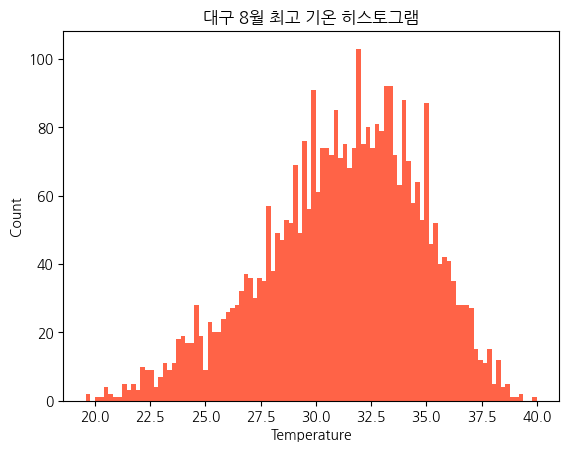

In [19]:
#대구 8월 최고 기온
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

f= open('daegu-utf8.csv',encoding='utf-8-sig')
data = csv.reader(f)
next(data)
aug=[]

for row in data:
    if row[0] !='' and row [4] !='':
        month = row[0].split('-')[1]
        if month == '08':
            aug. append(float(row[-1]))

f.close()

plt.hist(aug,bins=100, color='tomato')
plt.title("대구 8월 최고 기온 히스토그램")
plt.xlabel("Temperature")   # x축레이블
plt.ylabel("Count")         # Y축 레이블
plt.show()

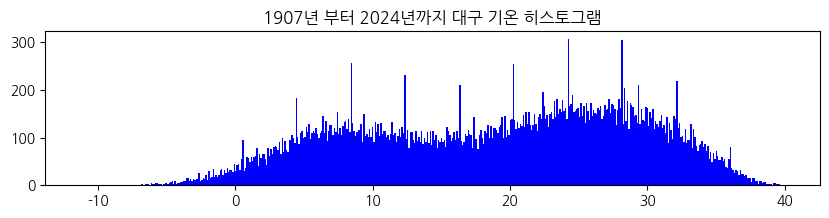

In [20]:
#최고 기온 데이터를 히스토그램으로 표현
import	csv
import	matplotlib.pyplot as	plt
import koreanize_matplotlib
f	=	open('daegu-utf8.csv',	encoding='utf-8-sig')
data	=	csv.reader(f)
next(data)
result	=	[]
for	row	in	data	:
	if	row[-1]	!=	''	:	#	최고 기온을 리스트에 저장
		result.append(float(row[-1]))
f.close()
plt.figure(figsize=(10,	2))
plt.hist(result,	bins=500,	color='blue')	#	result에 저장된 값을 히스토그램으로 그림
plt.rc('font',	family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']	=	False	 #	레이블에 마이너스('-')기호 깨지는 현상 해결
plt.title("1907년 부터 2024년까지 대구 기온 히스토그램")
plt.show()


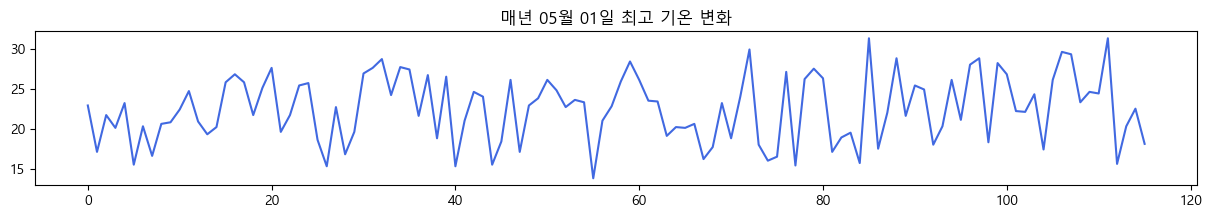

In [21]:
# 매년 특정 날짜의 최고 기온 찾기
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

def draw_graph_on_date(month,day):
    f=open('daegu-utf8.csv',encoding='utf-8-sig')
    data = csv.reader(f)
    next(data)
    result=[]
    for row in data:
        if row[-1] !='':
            date_string=row[0].split('-')
            if date_string[1]==month and date_string[2] ==day:
                result.append(float(row[-1]))   #최고 기온을 실수형으로 변환 후 리스트에 추가
    f.close()
    plt.figure(figsize=(15,2))
    plt.plot(result,	'royalblue')
    plt.rc('axes',unicode_minus=False)
    plt.title(f'매년 {month}월 {day}일 최고 기온 변화')
    plt.show()
month,date = input("날짜(월 일)를 입력하세요: ").split()
draw_graph_on_date(month,date)

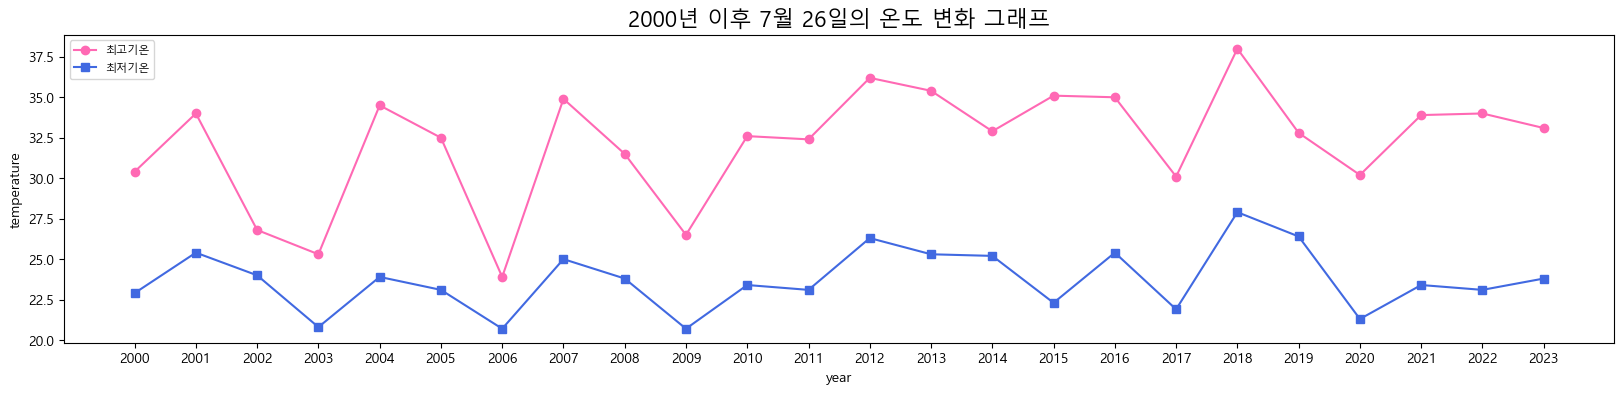

In [22]:
# 2000년 이후 특정일의 최저, 최고 기온 찾기 #1
import csv
import matplotlib.pyplot as plt
import platform
import koreanize_matplotlib

def draw_lowhigh_graph(start_year,month,day):
    f=open('daegu-utf8.csv',encoding='utf-8-sig')
    data=csv.reader(f)
    next(data)
    high_temp=[] # 최고 기온을 저장할 리스트
    low_temp=[] # 최저 기온을 저장할 리스트
    x_year=[] #x축 연도를 저장할 리스트
    
    for row in data : 
        if row[-1] !='':
            date_string = row[0].split('-')	#	날짜 데이터를 미리 분리함
            if	int(date_string[0])	>=	start_year:	#	문자열 값을 int형으로 변환해서 비교
                if int(date_string[1])	==	month and int(date_string[2])	==	day:
                    high_temp.append(float(row[-1]))
                    low_temp.append(float(row[-2]))
                    x_year.append(date_string[0])	#	연도 저장
    f.close()

    plt.figure(figsize=(20,	4))
    plt.plot(x_year,	high_temp,	'hotpink',	marker='o',	label='최고기온')	#	최고 기온 그래프
    plt.plot(x_year,	low_temp,	'royalblue',	marker='s',	label='최저기온')	#	최저 기온 그래프
    if	platform.system()	==	'Windows':
           plt.rc('font',	family='Malgun Gothic',	size=8)	#	간단히 맑은 고딕으로 설정
    else:
        plt.rc('font',	family='AppleGothic',	size=8)	#	한글 폰트 사용 For	Mac	OS
    plt.rcParams['axes.unicode_minus']	=	False	#	음수(-)가 깨지는 것 방지
    plt.title(f"{start_year}년 이후 {month}월 {day}일의 온도 변화 그래프",	size=16)
	
    plt.legend(loc=2)
    plt.xlabel('year')
    plt.ylabel('temperature')
    plt.show()

draw_lowhigh_graph(2000, 7,	26)

In [23]:
import	pandas	as	pd
weather_df = pd.read_csv('daegu-utf8.csv',	encoding='utf-8-sig')
print(weather_df.columns)
print(weather_df['날짜'].dtype)	#	날짜 컬럼은 object	타입
weather_df.columns=['날짜',	'지점',	'평균기온',	'최저기온',	'최고기온']
print(weather_df.columns)
weather_df['날짜']	=	pd.to_datetime(weather_df['날짜'],	format='%Y-%m-%d')
print(weather_df['날짜'].dtype)
print(weather_df.head(5))
print(weather_df.shape)
num_rows =	weather_df.shape[0]	#	shape(row,	col),	shape[0]:	row의 개수
num_missing =	num_rows - weather_df.count()	#	count():	정상값의 개수
print(num_missing)
print()
weather_df =	weather_df.dropna(axis=0)
print(weather_df.count())
print(weather_df.head(5))
print()
weather_df.to_csv('daegu-utf8-df.csv',	index=False,	mode='w',	encoding='utf-8-sig')    
print('특정 연도와 달의 최고,	최저 기온 평균값 계산')
year_df =	weather_df[weather_df['날짜'].dt.year ==	2023]
month_df =	year_df[year_df['날짜'].dt.month ==	8]
print(month_df.head())
print()

max_temp_mean= round(month_df['최고기온'].mean(),1)
min_tenmp_mean= round(month_df['최고기온'].mean(),1)

print(f'2023년 8월 최저기온 평균 :{min_tenmp_mean}')

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')
object
Index(['날짜', '지점', '평균기온', '최저기온', '최고기온'], dtype='object')
datetime64[ns]
          날짜     지점  평균기온  최저기온  최고기온
0 1907-01-31  143.0   NaN  -7.0   0.8
1 1907-02-01  143.0   NaN   NaN   NaN
2 1907-02-02  143.0   NaN   NaN   NaN
3 1907-02-03  143.0   NaN   NaN   NaN
4 1907-02-04  143.0   NaN   NaN   NaN
(42887, 5)
날짜        1
지점        1
평균기온    704
최저기온    630
최고기온    632
dtype: int64

날짜      42180
지점      42180
평균기온    42180
최저기온    42180
최고기온    42180
dtype: int64
            날짜     지점  평균기온  최저기온  최고기온
701 1909-01-01  143.0  -4.1  -8.0   0.1
702 1909-01-02  143.0  -0.8  -6.7   6.1
703 1909-01-03  143.0   1.0  -2.4   3.6
704 1909-01-04  143.0   4.2   0.0   9.2
705 1909-01-05  143.0   3.4  -0.4   9.0

특정 연도와 달의 최고,	최저 기온 평균값 계산
              날짜     지점  평균기온  최저기온  최고기온
42551 2023-08-01  143.0  29.7  24.9  34.8
42552 2023-08-02  143.0  30.0  23.9  34.7
42553 2023-08-03  143.0  31.5  27.0  37.7
42554 2023-08-04 

1990년대 8월 최고 기온 평균 : [33.9, 28.3, 29.0, 27.0, 34.5, 34.0, 32.3, 30.9, 30.1, 29.1]
2010년대 8월 최고 기온 평균"[33.6, 30.3, 32.4, 34.4, 28.8, 31.2, 33.2, 31.4, 32.9, 32.2]
1990년대 8월 전체 최고 기온 평균:	30.9
2010년대 8월 전체 최고 기온 평균:	32.0


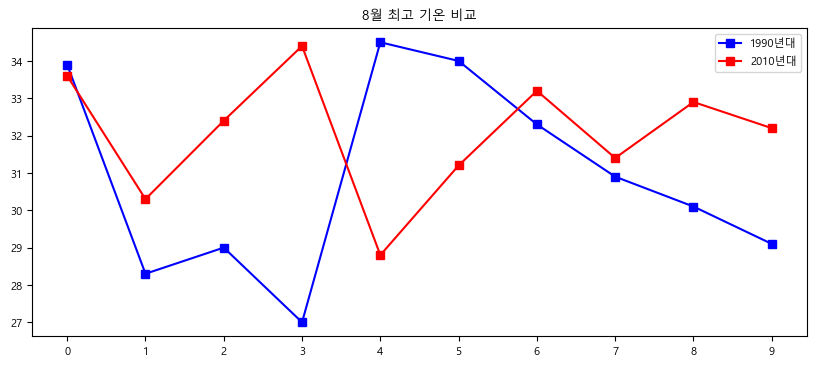

In [27]:
#1990년대와 2010년대 최고 기온 비교 

def	draw_two_plots(title,	x_data,	max_temp_list1,	label_y1,	max_temp_list2,	label_y2):
    plt.rcParams['axes.unicode_minus']	=	False		
    plt.figure(figsize=(10,	4))
    plt.plot(x_data,	max_temp_list1,	marker='s',	markersize=6,	color='b',	label=label_y1)
    plt.plot(x_data,	max_temp_list2,	marker='s',	markersize=6,	color='r',	label=label_y2)
    plt.xticks(x_data)		#	모든 xtick값을 출력함
    #plt.ylim(10,	40)
    plt.title(title)
    plt.legend()
    plt.show()

def main():
    search_month=int(input("비교할 월을 입력하세요: "))
    weather_df =pd.read_csv('daegu-utf8-df.csv',encoding='utf-8-sig')
    weather_df['날짜'] = pd.to_datetime(weather_df['날짜'],	format='%Y-%m-%d')

    first_decade_max_temp_list=[0]*10 # 10년 동안 각 월의 평균 저장
    second_decade_max_temp_list=[0]*10

    first_decade=1990
    second_decade =2010

    for year in range(10):
        first_decade_df=weather_df[(weather_df['날짜'].dt.year==first_decade+year)&
                                   (weather_df['날짜'].dt.month==search_month)]
        first_decade_max_temp_list[year]=round(first_decade_df['최고기온'].mean(),1)
        second_decade_df=weather_df[(weather_df['날짜'].dt.year==second_decade+year)&
                                    (weather_df['날짜'].dt.month == search_month)]
        second_decade_max_temp_list[year]=round(second_decade_df['최고기온'].mean(),1)

    print(f'{first_decade}년대 {search_month}월 최고 기온 평균 : { first_decade_max_temp_list}')
    print(f'{second_decade}년대 {search_month}월 최고 기온 평균"{second_decade_max_temp_list}')

    first_decade_high_temp_mean =	round(sum(first_decade_max_temp_list)	/
                                        len(first_decade_max_temp_list),	1)
    second_decade_high_temp_mean =	round(sum(second_decade_max_temp_list)	/
                                        len(second_decade_max_temp_list),	1)
    print(f'{first_decade}년대 {search_month}월 전체 최고 기온 평균:	{first_decade_high_temp_mean}')
    print(f'{second_decade}년대 {search_month}월 전체 최고 기온 평균:	{second_decade_high_temp_mean}')
    x_data =	[i for	i in	range(10)]
    draw_two_plots(f'{search_month}월 최고 기온 비교',	x_data,
	                first_decade_max_temp_list,	str(first_decade)+'년대',
					second_decade_max_temp_list,	str(second_decade)+	'년대')
main()
